# Propagation of Hollow Core waveguide for long wavelengths

For which we only have a few relevant leaky modes.

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import json
from slab import SlabExact, plotlogf, plotlogf_real
from scipy.optimize import newton
from scipy.integrate import quad

plt.style.use('dark_background')
%matplotlib widget

# Setup Waveguide and Input fields

In [153]:
loss_min_wl = 5.828070175438596e-06
max_loss_wl = 6.90764472e-06
long_wl = 1.5e-4

In [91]:
A = SlabExact(scale=1e-5, Ts=[15, 1, 8, 1, 15],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[100, 40, 300, 40, 100],
              symmetric=True, wl=long_wl)

In [92]:
b = 1.25
a = 1/ b**2
def quadratic_piecewise(x):
    conds = [(x<-b), ((-b<=x)*(x<=b)), (x>b)]
    funcs = [0, lambda x: 1 - a * x**2, 0]
    return np.piecewise(x, conds, funcs)
    
def modified_dist(x):
    return (x-1/4) * np.exp(-(x-1/2)**2)  

def odd_modified_dist(x):
    return x * np.exp(-x**2)
    
def normal_dist(x):
    return np.exp(-x**2)

In [93]:
# Set input function
f0 = quadratic_piecewise

# Set input field type
field_type = 'TE'

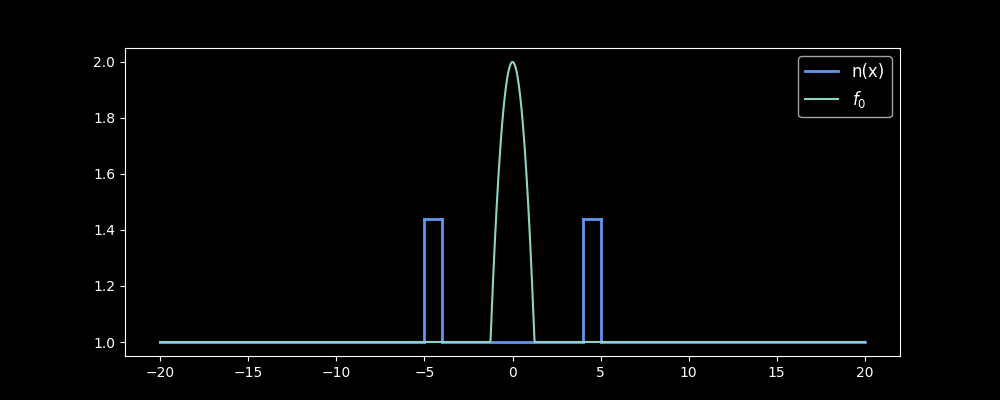

In [94]:
A.plot_refractive_index(color='cornflowerblue', linewidth=2, figsize=(10,4));
A.add_1d_plot(lambda x: f0(x) + 1, label='$f_0$')

# Guided Portion

Based on info below, we found the actual guided mode near K_low

In [95]:
mode_type = 'guided'
k_low = A.K_low

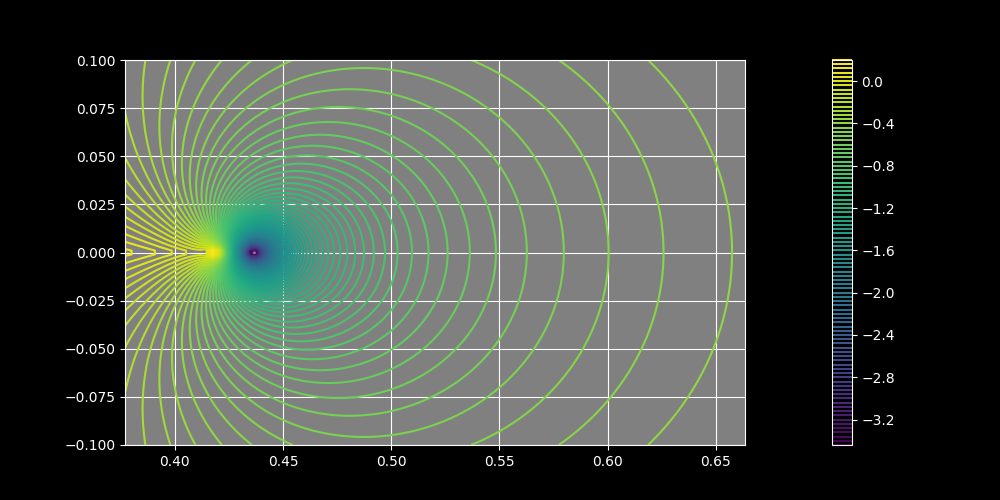

In [50]:
plotlogf(A.determinant, .9*A.K_low, 1.1*A.K_high, -.1, .1, field_type, mode_type, figsize=(10,5),iref=100, rref=100,levels=100)

In [51]:
beta1 = newton(A.determinant, .45, args=('TE', mode_type), tol=1e-13)
print(abs(A.determinant(beta1, 'TE', mode_type)))
plt.plot(beta1.real, beta1.imag, marker='o')
beta1

4.1661987333319334e-16


(0.43627103203151385-3.3021712280434012e-18j)

In [52]:
Fs1 = A.fields(beta1, field_type='TE', mode_type=mode_type)


(0.0, 0.8)

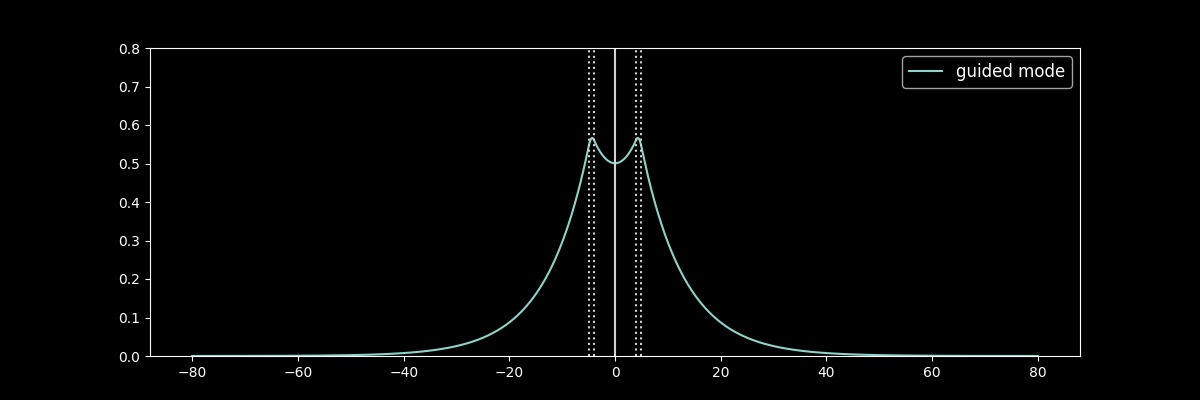

In [53]:
A.plot_field_1d(Fs1, xs=np.linspace(-80, 80, 2000), label='guided mode', figsize=(12,4));
plt.gca().set_ylim(0, .8)

At this long wavelength, the only guided mode remaining is the one above.  As it has significant intensity in the core region, it will participate in expansion of input field.

## Get coefficient of guided mode


In [54]:
integrand = lambda x: Fs1(x) * Fs1(x)
cf1 = quad(integrand, -100, 100, complex_func=True)[0].real

integrand = lambda x: f0(x) * Fs1(x)
cf2 = quad(integrand, -b, b, complex_func=True)[0].real

alpha = cf2/cf1

cf1, cf2, alpha

(5.22230228841117, 0.8363227378952555, 0.16014445195008)

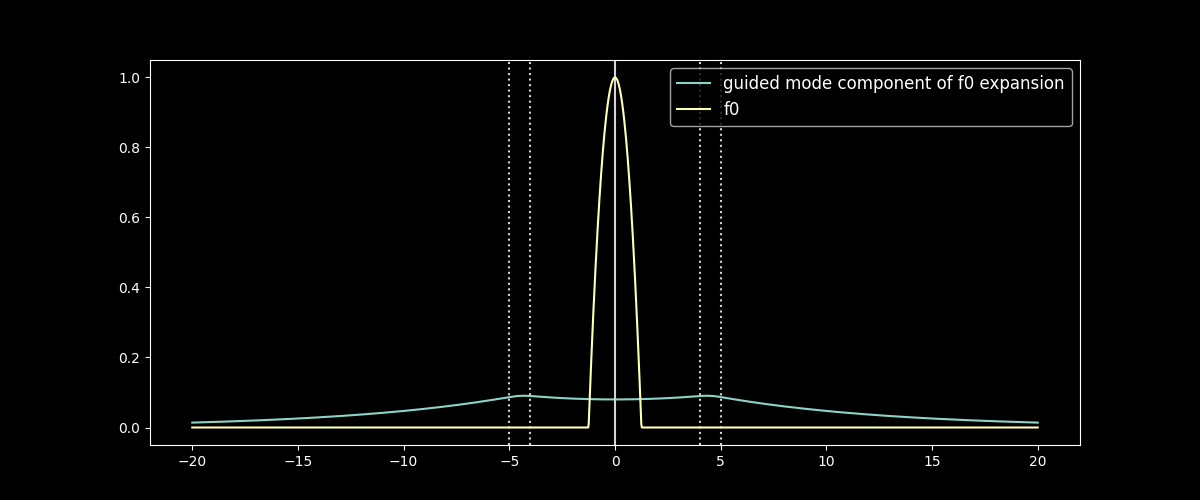

In [55]:
A.plot_field_1d(lambda x: alpha * Fs1(x), label='guided mode component of f0 expansion');
A.add_1d_plot(f0, label='f0')

# Propagate Radiation Field

In [56]:
Propagator_Class = A.propagator()


## Propagating Portion

In [57]:
paper_method=False


In [58]:
P1 = Propagator_Class(A.real_contour(0.00000001, .95*A.Z_evanescent.real, 400), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method, 
                     sign='+1')

In [59]:
P1_5 = Propagator_Class(A.real_contour(.95*A.Z_evanescent.real, A.Z_evanescent.real, 200), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method, 
                     sign='+1')

/home/pv/local/slab/slab.py:1622: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=legend_fontsize)


(<Figure size 1100x400 with 1 Axes>, <Axes: >)

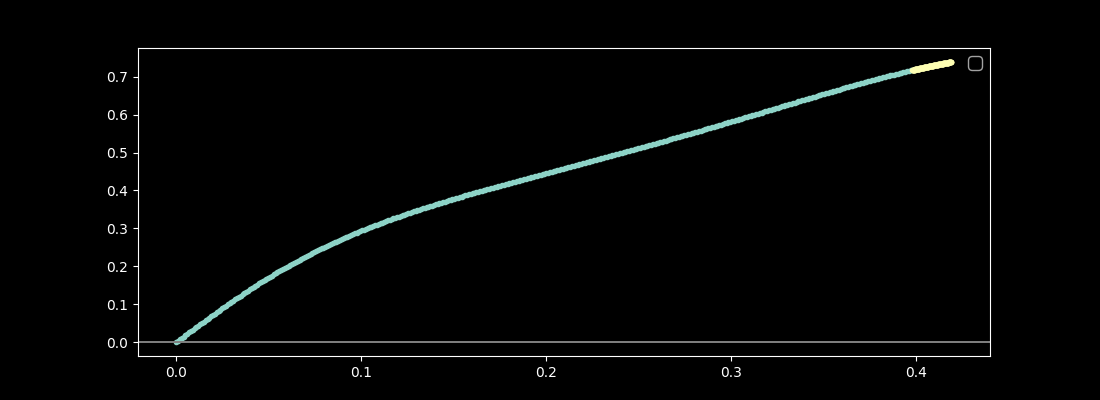

In [60]:
P1.plot_transform(xs=P1.Zs)
P1_5.plot_transform(ax=plt.gca(), xs=P1_5.Zs)

## Evanescent Portion

In [61]:
# P2 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=A.Z_evanescent.real, RZ=1.5, NZ=50, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P2 = Propagator_Class(A.real_contour(A.Z_evanescent.real, 1.05*A.Z_evanescent.real, 200), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method, 
                     sign='+1')

In [62]:
# P2 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=A.Z_evanescent.real, RZ=1.5, NZ=50, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P2_5 = Propagator_Class(A.real_contour(1.05*A.Z_evanescent.real, 1.5, 300), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method, 
                     sign='+1')

In [63]:
# P3 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=1.5, RZ=3.5, NZ=70, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P3 = Propagator_Class(A.real_contour(1.5, 3.5, 250), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method, 
                     sign='+1')

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

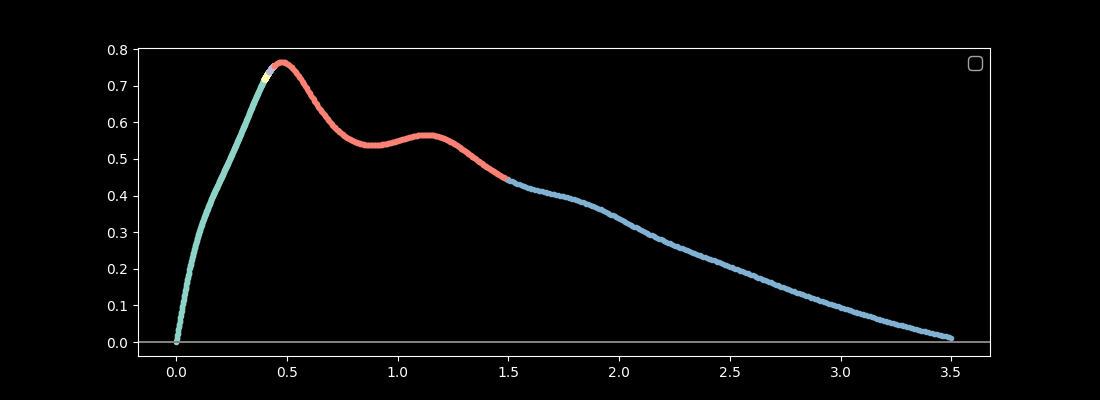

In [64]:
plt.close('all')
fig, ax = P1.plot_transform(xs=P1.Zs)
P1_5.plot_transform(ax=ax, xs=P1_5.Zs)
P2.plot_transform(ax=ax, xs=P2.Zs)
P2_5.plot_transform(ax=ax, xs=P2_5.Zs)
P3.plot_transform(ax=ax, xs=P3.Zs)

In [65]:
# P4= Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=3.5, RZ=6, NZ=60, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P4 = Propagator_Class(A.real_contour(3.5, 7, 200), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method, 
                     sign='+1')

In [66]:
# P5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=6, RZ=20, NZ=80, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')
P5 = Propagator_Class(A.real_contour(7, 20, 200), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method, 
                     sign='+1')

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

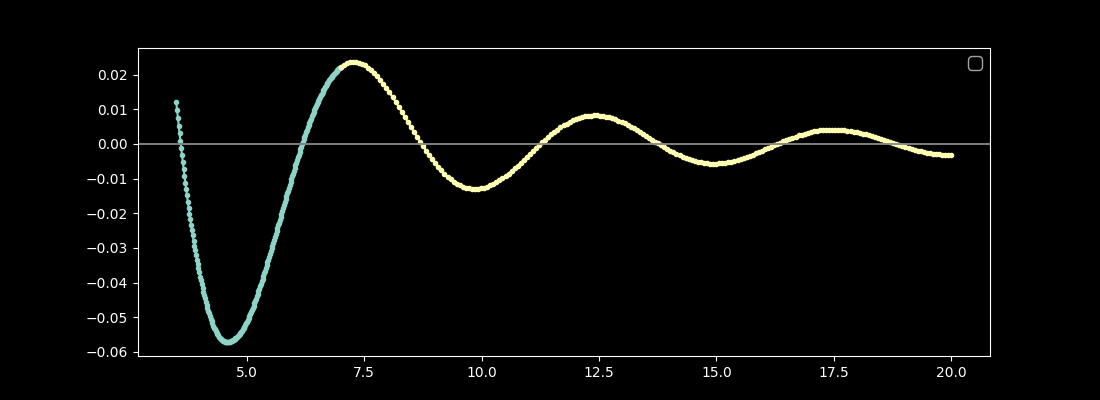

In [67]:
plt.close('all')
_, ax = P4.plot_transform(xs=P4.Zs)
P5.plot_transform(ax=ax, xs=P5.Zs)

In [68]:
# P6 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=20, RZ=30, NZ=80, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P6 = Propagator_Class(A.real_contour(20,30,200), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method, 
                     sign='+1')

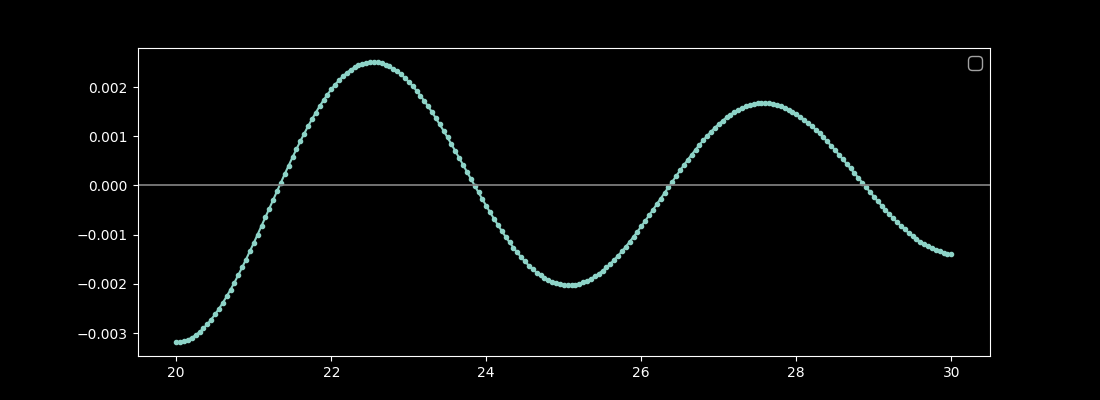

In [69]:
plt.close('all')
P6.plot_transform(xs=P6.Zs);

In [70]:
# P7 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=30, RZ=40, NZ=60, 
#                      field_type=field_type, paper_method=paper_method, conjugate=conjugate,
#                      sign='+1')

P7 = Propagator_Class(A.real_contour(30, 40, 200), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method, 
                     sign='+1')

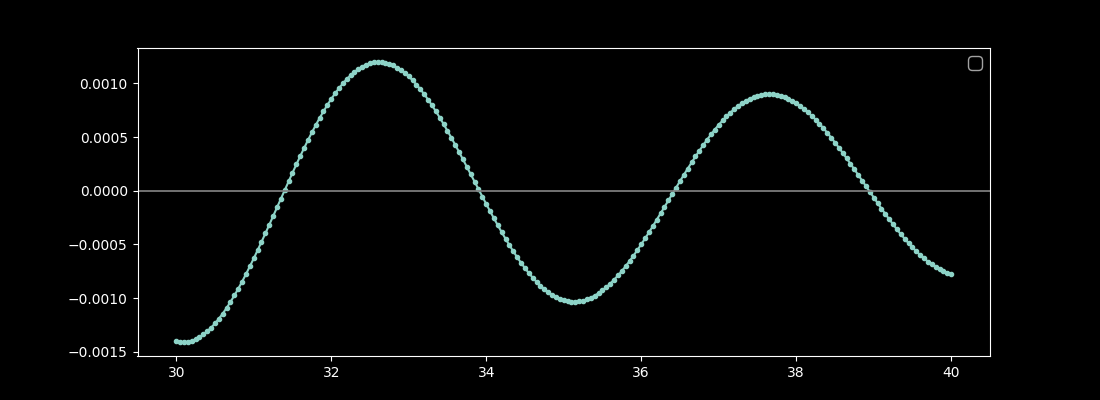

In [71]:
plt.close('all')
P7.plot_transform(xs=P7.Zs);

In [72]:

P8 = Propagator_Class(A.real_contour(40, 60, 200), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method, 
                     sign='+1')

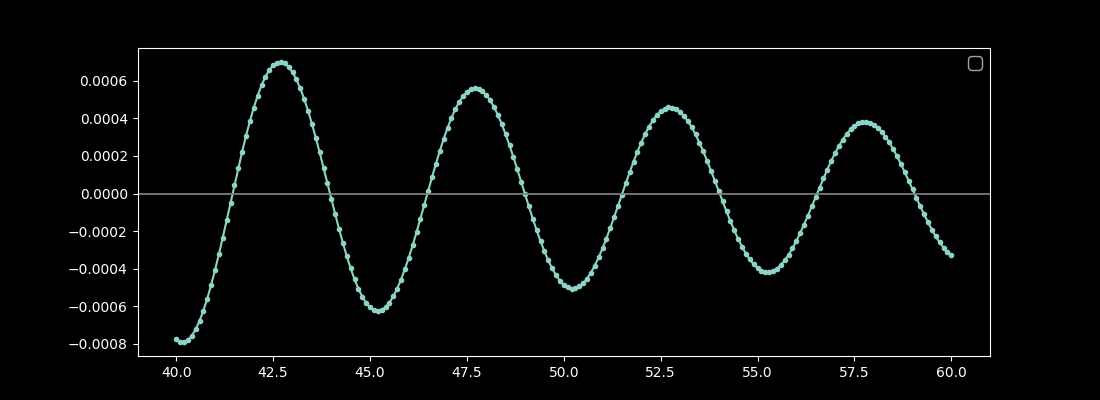

In [73]:
plt.close('all')
P8.plot_transform(xs=P8.Zs);

In [74]:

P9 = Propagator_Class(A.real_contour(60, 100, 400), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=paper_method, 
                     sign='+1')

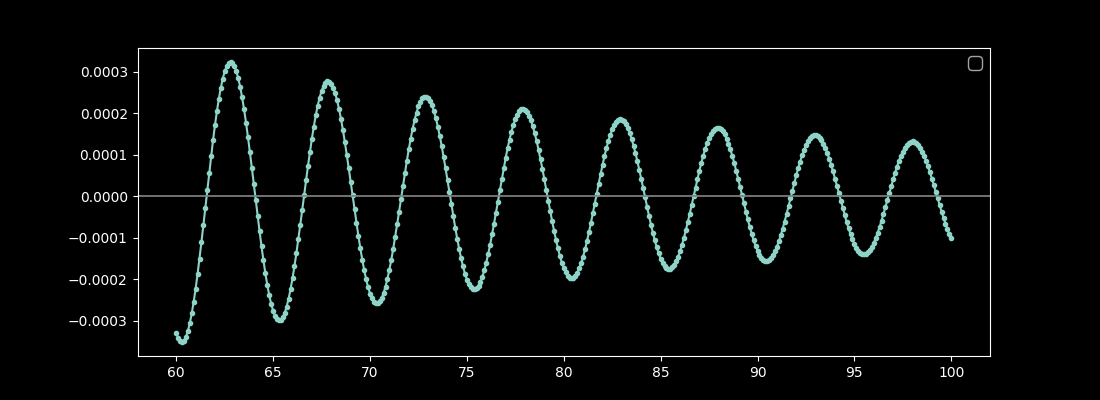

In [75]:
plt.close('all')
P9.plot_transform(xs=P9.Zs);

In [76]:
# F = A.fields_Z(7, mode_type='radiation', paper_method=False)
# A.plot_field_1d(F, xs=np.linspace(-3,3, 4000))

# Cross sections at input


In [77]:
propfuncs = [
    P1,
    P1_5
]
evfuncs = [
    P2,
    P2_5,
    P3,
    P4,
    P5,
    P6,
    P7,
    P8,
    P9,
]

In [78]:
guided = lambda x: alpha * Fs1(x)
prop = lambda x: sum([f.slice_propagate(x) for f in propfuncs])
ev = lambda x: sum([f.slice_propagate(x) for f in evfuncs]) 
full = lambda x: prop(x) + ev(x) + guided(x)
rad =  lambda x: prop(x) + ev(x)
diff = lambda x: full(x) - f0(x)

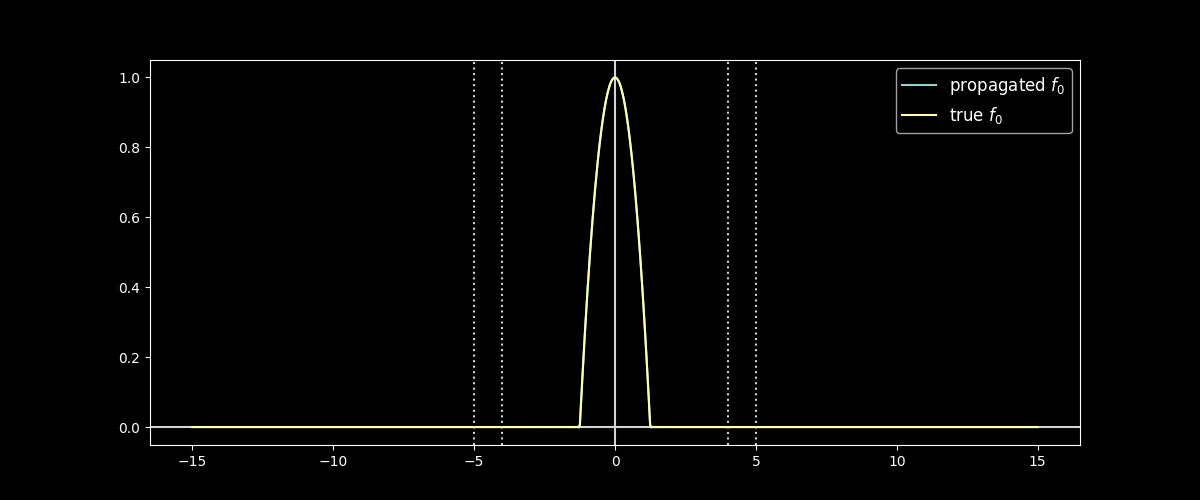

In [79]:
A.plot_field_1d(full, xs=np.linspace(-15, 15, 1000), label='propagated $f_0$') 
A.add_1d_plot(f0, xs=np.linspace(-15, 15, 1000), label='true $f_0$')
# A.add_1d_plot(diff, xs=np.linspace(-25, 25, 10000), label='difference')
# plt.gca().set_ylim(-.01,.01)

In [80]:
# A.plot_field_1d(rad, label='propagated radiation portion of $f_0$') 
# A.add_1d_plot(f0, label='true $f_0$')
# A.add_1d_plot(diff, label='difference')
# plt.gca().set_xlim(-3,3)

## 1-D Slice of Propagation in z direction

In [81]:
x0 = 0

guided_z = lambda z, x0=x0: alpha * Fs1(x0, zs=z)[:, 0]
prop_z = lambda z, x0=x0: sum([f.slice_propagate(z, slice_at=x0, constant_variable='x') for f in propfuncs])
ev_z = lambda z, x0=x0: sum([f.slice_propagate(z, slice_at=x0, constant_variable='x') for f in evfuncs]) 

full_z = lambda z, x0=x0: prop_z(z, x0=x0) + ev_z(z, x0=x0) + guided_z(z, x0=x0)
rad_z =  lambda z, x0=x0: prop_z(z, x0=x0) + ev_z(z, x0=x0)


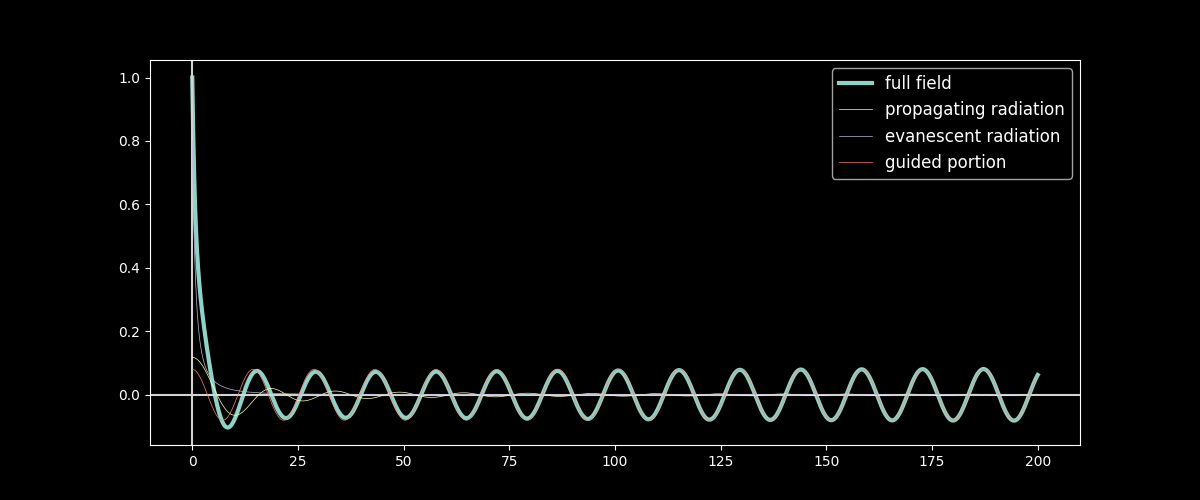

In [82]:
part = 'real'
zmin, zmax = 0,200
zref=int((zmax-zmin)*40)
zs = np.linspace(zmin, zmax, zref)

A.plot_field_1d(full_z, xs=zs, part=part, plot_axis=True, plot_Rhos=False, linewidth=3, label='full field');
A.add_1d_plot(prop_z, xs=zs, part=part, linewidth=.5, linestyle='-', label='propagating radiation');
A.add_1d_plot(ev_z, xs=zs, part=part, linewidth=.5, linestyle='-', label='evanescent radiation');
A.add_1d_plot(guided_z, xs=zs, part=part, linewidth=.5, linestyle='-', label='guided portion');


(-0.08, 0.2)

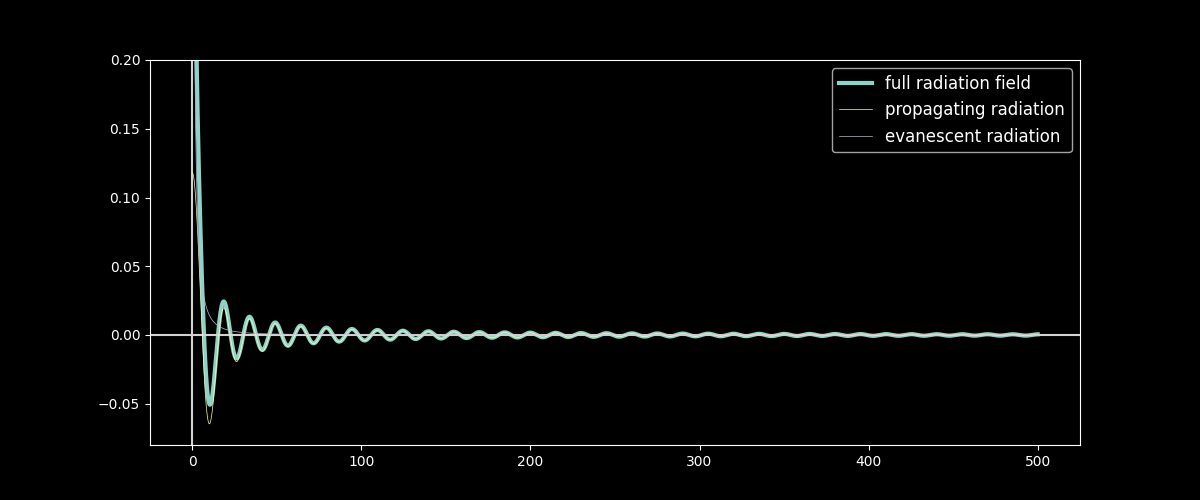

In [83]:
part = 'real'
zmin, zmax = 0,500
zref=int((zmax-zmin)*40)
zs = np.linspace(zmin, zmax, zref)

A.plot_field_1d(rad_z, xs=zs, part=part, plot_axis=True, plot_Rhos=False, linewidth=3, label='full radiation field');
A.add_1d_plot(prop_z, xs=zs, part=part, linewidth=.5, linestyle='-', label='propagating radiation');
A.add_1d_plot(ev_z, xs=zs, part=part, linewidth=.5, linestyle='-', label='evanescent radiation');
plt.gca().set_ylim(-.08, .2)

In [84]:
# F = A.fields_Z(1.01*A.Z_evanescent, mode_type='radiation', paper_method=False)

# x0 = 0
# Fz = lambda z, x0=x0: F(x0, zs=z)[:, 0]

# A.plot_field_1d(Fz, xs=np.linspace(0,100,10000), plot_Rhos=False)

# 2D Filled Contour Plots

In [96]:
Guided = lambda x, z: alpha * Fs1(x, zs=z)
Prop = lambda x, z: sum([f.propagate(x, zs=z) for f in propfuncs])
Ev = lambda x, z: sum([f.propagate(x, zs=z) for f in evfuncs]) 
Full = lambda x, z: Guided(x, z) + Prop(x, z) + Ev(x, z)
Rad = lambda x, z: Prop(x, z) + Ev(x, z)

In [97]:
# Setting Xs, useful to differentiate resolution between regions
B= SlabExact(scale=1e-5, Ts=[10, 1, 8, 1, 10],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[20, 3, 50, 3, 20],
              symmetric=True, wl=max_loss_wl)

In [98]:
xs = B.all_Xs

In [88]:
# plt.close('all')
# fig = plt.figure(1, figsize=(11,4))
# plt.plot(xs, full(xs).real, marker='o', markersize=2);

In [63]:
# Good ratio for z is 40 points per 2 units (so 20 points per unit)
# zmin, zmax=0, 60
# A.plot_field_2d(Full, xs=xs, zmin=zmin,
#                 colorbar=True, colorbar_orientation='vertical', maxdim=8,
#                 zmax=zmax, zref=int((zmax-zmin)*5),
#                 equal=True,
#                 levels=100,
#                );

# Surface Plot

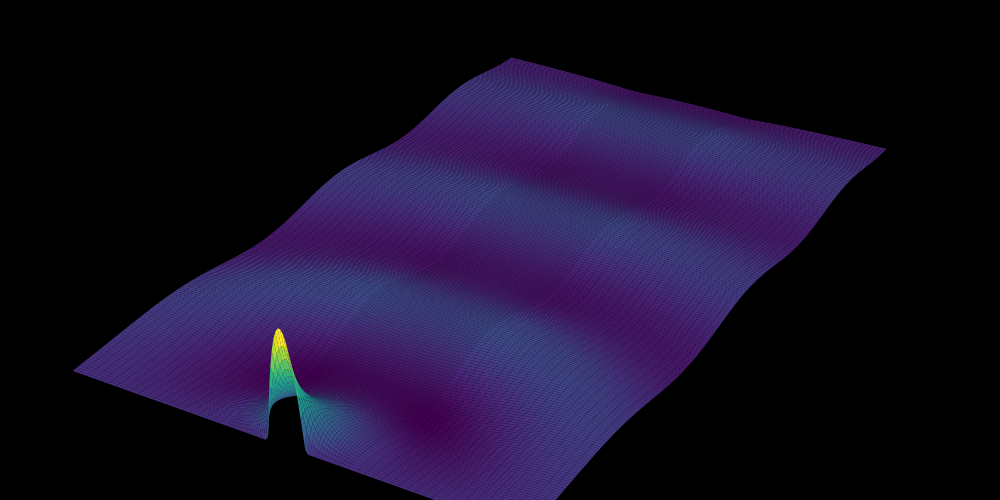

In [99]:
zmin, zmax=0, 50
A.plot_field_2d_surface(Full, xs=xs, colorbar=False, zoom=3,
                azim=-60, elev=30, zmin=0,
                zmax=zmax, zref=int(zmax*5),
                rstride=1, cstride=1,
               );

# Leaky mode representation via contour integration


interactive(children=(FloatSlider(value=0.00015, description='wl', layout=Layout(width='90%'), max=0.00015, mi…

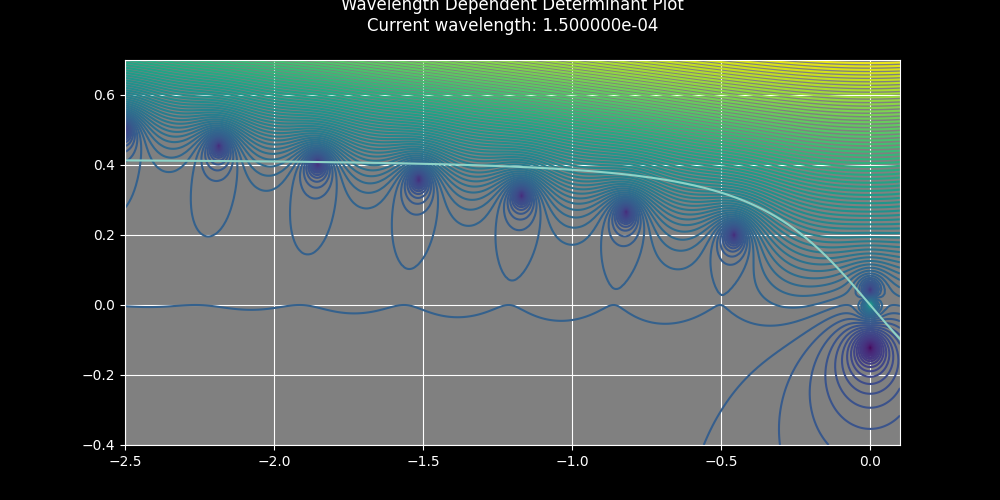

In [100]:
A.interactive_determinant_plot(minwl=long_wl, maxwl=long_wl, imin=-.4, imax=.7, rmin=-2.5, rmax=.1, levels=120, sdp_sign=-1,
                              iref=100, rref=500, figsize=(10,5))

In [101]:
A.wl = long_wl

In [102]:
z_guesses = np.array([
    -.5 + .2j, 
    -1.2 + .3j,
    -1.9 + .4j, 
])

Zs = []
for z in z_guesses:
    Zs.append(newton(A.determinant_Z, z, args=(field_type, 'leaky'), tol=1e-13))
Zs = np.array(Zs)

for Z in Zs:
    plt.plot(Z.real, Z.imag, marker='o')

## Construct field

In [103]:
P_leaky = []
paper_method=False

for Z in Zs[:]:
    circ_contour = A.circular_contour(Z, 1e-6, 100)
    PZe = Propagator_Class(circ_contour, f0=f0, Lx=-b, Rx=b, 
                          field_type=field_type,
                          sign='+1',
                          paper_method=paper_method)
    P_leaky.append(PZe)

In [104]:
# i=0
# particular_leaky_field = lambda x: P_leaky[i].slice_propagate(x)
# A.plot_field_1d(particular_leaky_field,  label='particular leaky mode');

In [105]:
leaky = lambda x : sum([P.slice_propagate(x) for P in P_leaky])
leaky_w_guided = lambda x: leaky(x) + alpha * Fs1(x)

Leaky = lambda x, z : sum([P.propagate(x, zs=z) for P in P_leaky])
Leaky_w_guided = lambda x, z: Leaky(x,z) + alpha * Fs1(x, zs=z)

diff_leaky_w_guided_full = lambda x: leaky_w_guided(x) - full(x)
Diff_leaky_w_guided_full = lambda x,z : Leaky_w_guided(x,z) - Full(x,z)

## Leaky field profile at input

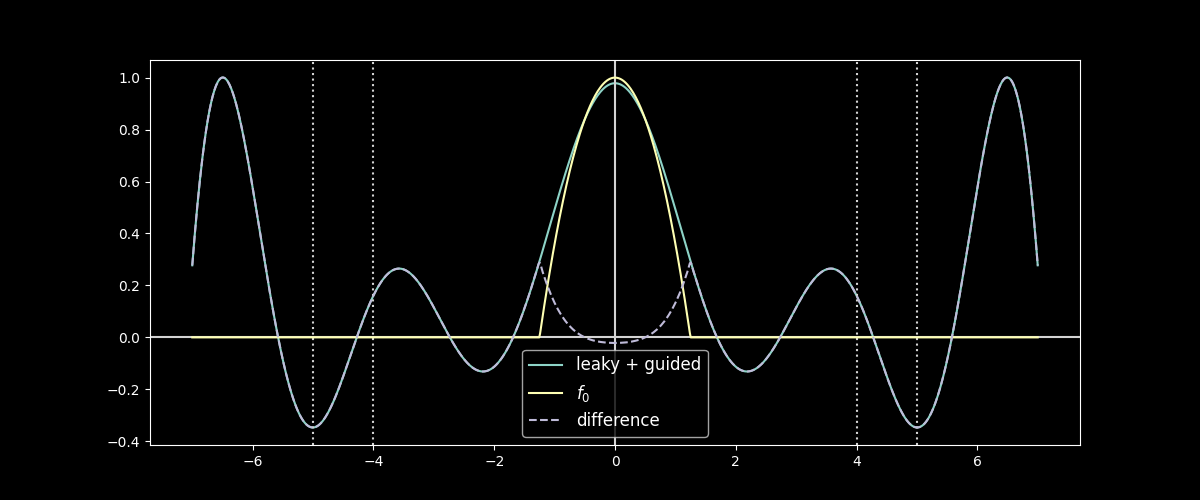

In [106]:
A.plot_field_1d(leaky_w_guided, xs=np.linspace(-7,7,1000), label='leaky + guided')
A.add_1d_plot(f0, xs=np.linspace(-7,7,1000), label='$f_0$')
A.add_1d_plot(diff_leaky_w_guided_full, xs=np.linspace(-7,7,1000), linestyle='--', label='difference')

## 2D overhead plot of leaky mode field approximation

In [107]:
# Setting Xs, useful to differentiate resolution between regions
C = SlabExact(scale=1e-5, Ts=[2, 1, 8, 1, 2],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[10, 8, 60, 8, 10],
              symmetric=True, wl=max_loss_wl)

In [108]:
# plt.plot.close('all')
# fig = plt.figure(1, figsize=(11,4))
# plt(C.all_Xs, full(C.all_Xs).real, marker='o', markersize=2);

Text(0.5, 0.98, 'True Field and Leaky + Guided Field Comparison\nwithout SDP contribution')

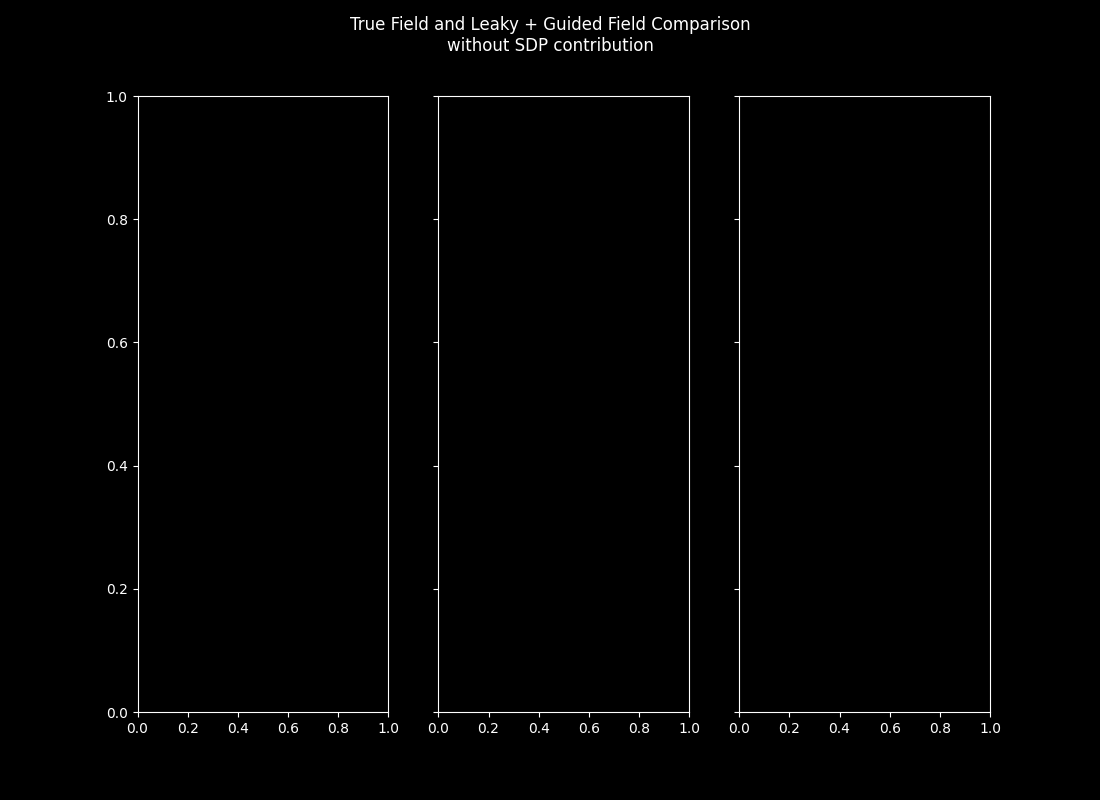

In [109]:
plt.close('all')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(11,8))

zmin = 0
zmax = 60
zref = int((zmax-zmin)*40/2)
zs = np.linspace(zmin, zmax, zref)
fig.suptitle('True Field and Leaky + Guided Field Comparison\nwithout SDP contribution')

In [110]:
A.add_2d_plot(Full, ax=ax1, xs=C.all_Xs, zs=zs, plot_Rhos=True, colorbar=True,);
ax1.set_title('True Field')

Text(0.5, 1.0, 'True Field')

In [111]:
A.add_2d_plot(Leaky_w_guided, ax=ax2, xs=C.all_Xs, zs=zs, plot_Rhos=True, colorbar=True);
ax2.set_title('Leaky + Guided no SDP')

Text(0.5, 1.0, 'Leaky + Guided no SDP')

In [112]:
A.add_2d_plot(Diff_leaky_w_guided_full, ax=ax3, xs=C.all_Xs, zs=zs, part='norm', plot_Rhos=True, colorbar=True);
ax3.set_title('Norm of Difference')

Text(0.5, 1.0, 'Norm of Difference')

## Asymptotics (slice along z-axis at x=0)

In [113]:
x0 = 0

leaky_z = lambda z, x0=x0: sum([P.slice_propagate(z, slice_at=x0, constant_variable='x') for P in P_leaky])
leaky_w_guided_z = lambda z, x0=x0: leaky_z(z, x0=x0) + alpha * Fs1(x0, zs=z)[:, 0]

diff_leaky_w_guided_full_z = lambda z, x0=x0: leaky_w_guided_z(z, x0=x0) - full_z(z, x0=x0)
diff_rad_leaky_z = lambda z, x0=x0: leaky_z(z, x0=x0) - rad_z(z, x0=x0)


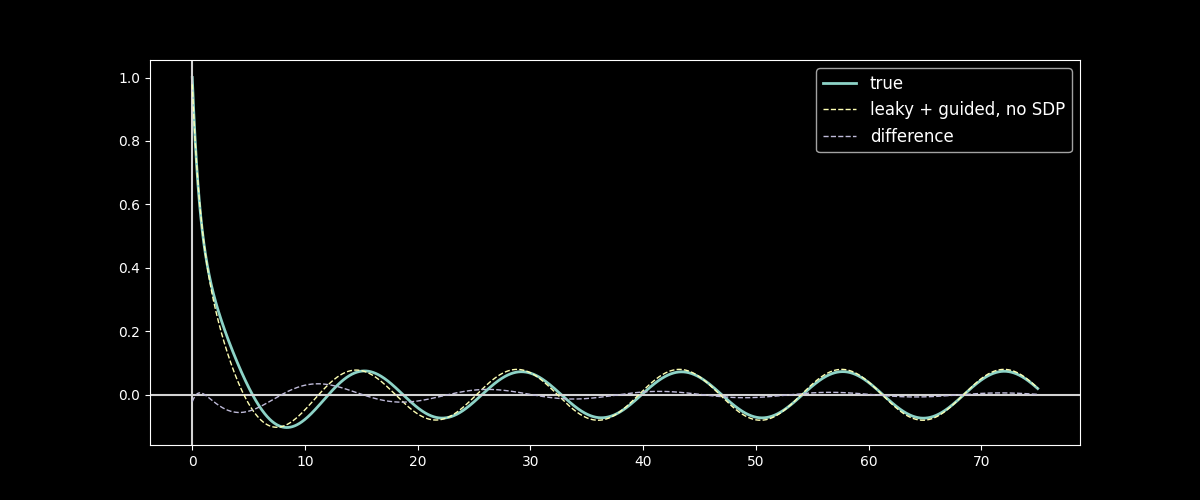

In [114]:
part = 'real'
zmin, zmax = 0,75
zref=int((zmax-zmin)*40)
zs = np.linspace(zmin, zmax, zref)

A.plot_field_1d(full_z, x0, xs=zs, part=part, plot_axis=True, plot_Rhos=False, linewidth=2, label='true');
A.add_1d_plot(leaky_w_guided_z, xs=zs, part=part, linewidth=1, linestyle='--', label='leaky + guided, no SDP');
A.add_1d_plot(diff_leaky_w_guided_full_z, xs=zs, part=part, linewidth=1, linestyle='--', label='difference');


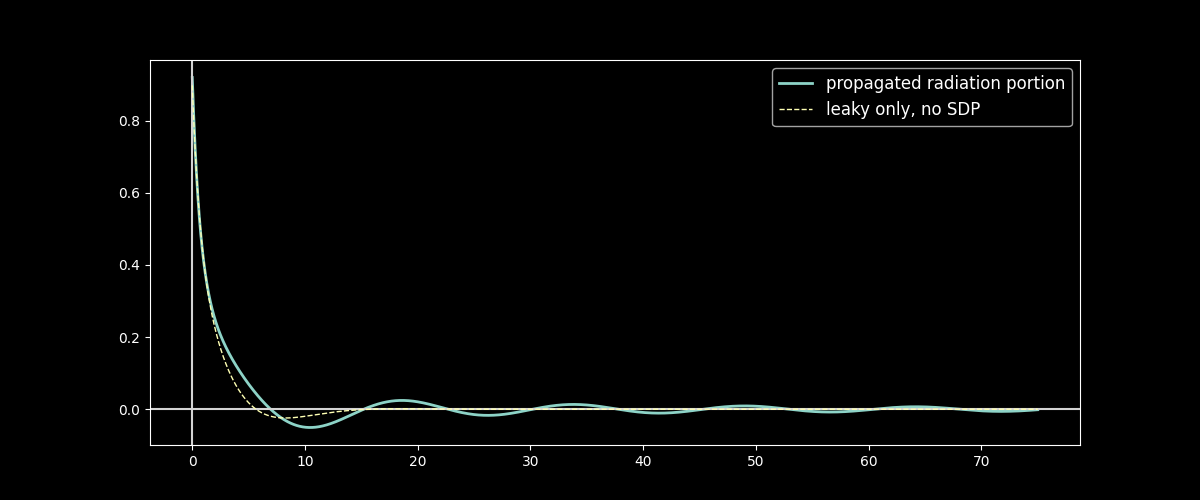

In [116]:
part = 'real'
zmin, zmax = 0,75
zref=int((zmax-zmin)*40)
zs = np.linspace(zmin, zmax, zref)

A.plot_field_1d(rad_z, x0, xs=zs, part=part, plot_axis=True, plot_Rhos=False, linewidth=2, label='propagated radiation portion');
A.add_1d_plot(leaky_z, x0, xs=zs, part=part, linewidth=1, linestyle='--', label='leaky only, no SDP');
# A.add_1d_plot(diff_rad_leaky_z, x0, xs=zs, part=part, linewidth=1, linestyle='--', label='difference');


# Integral along Steepest Descent Path in Z plane

Here we examine the remaining portion of the expansion, namely the integral along the steepest descent path (SDP).

## Propagate along SDP

We now have built-in capabilities to do this

In [117]:
Propagator_Class = A.propagator()

In [118]:
P_sdp1 = Propagator_Class(A.sdp_contour(-.000000001, -.3, 120), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=False,
                     sign='+1',)

In [119]:
# P_sdp2 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=-.3, RZ=-.5, NZ=60, 
#                      field_type=field_type, paper_method=False, conjugate=False,
#                      sign='+1', sdp_contour=True, sdp_sign=-1)
P_sdp2 = Propagator_Class(A.sdp_contour(-.3, -.5, 120), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=False,
                     sign='+1')

In [120]:
# P_sdp3 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=-.5, RZ=-1.1, NZ=80, 
#                      field_type=field_type, paper_method=False, conjugate=False,
#                      sign='+1', sdp_contour=True, sdp_sign=-1)
P_sdp3 = Propagator_Class(A.sdp_contour(-.5, -1.1, 120), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=False,
                     sign='+1')

In [121]:
# P_sdp4 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=-1.1, RZ=-1.2, NZ=60, 
#                      field_type=field_type, paper_method=False, conjugate=False,
#                      sign='+1', sdp_contour=True, sdp_sign=-1)
P_sdp4 = Propagator_Class(A.sdp_contour(-1.1, -1.2, 120), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=False,
                     sign='+1')

/home/pv/local/slab/slab.py:1622: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=legend_fontsize)


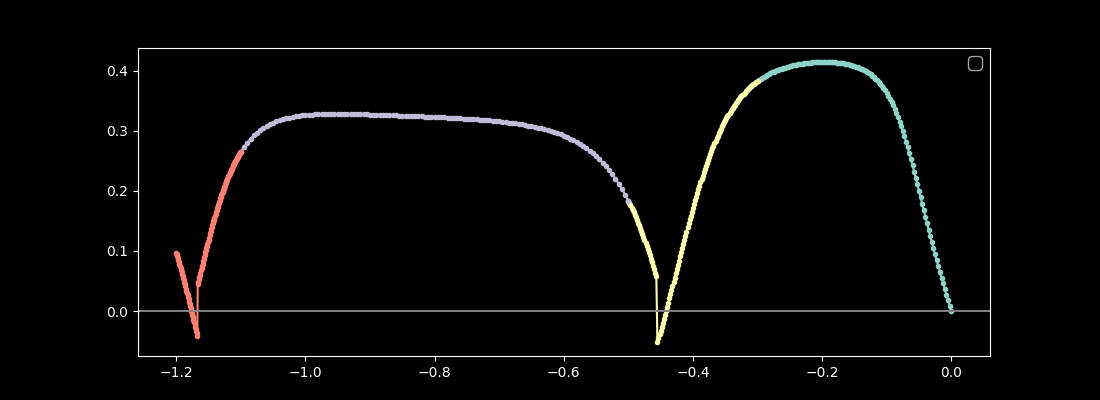

In [122]:
plt.close('all')
_, ax = P_sdp1.plot_transform(xs=P_sdp1.Zs.real)
P_sdp2.plot_transform(xs=P_sdp2.Zs.real, ax=ax)
P_sdp3.plot_transform(xs=P_sdp3.Zs.real, ax=ax);
P_sdp4.plot_transform(xs=P_sdp4.Zs.real, ax=ax);

In [123]:
# P_sdp5 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=-1.2, RZ=-1.8, NZ=50, 
#                      field_type=field_type, paper_method=False, conjugate=False,
#                      sign='+1', sdp_contour=True, sdp_sign=-1)
P_sdp5 = Propagator_Class(A.sdp_contour(-1.2, -1.8, 120), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=False,
                     sign='+1')

In [124]:
# P_sdp6 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=-1.8, RZ=-1.9, NZ=70, 
#                      field_type=field_type, paper_method=False, conjugate=False,
#                      sign='+1', sdp_contour=True, sdp_sign=-1)
P_sdp6 = Propagator_Class(A.sdp_contour(-1.8, -1.9, 150), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=False,
                     sign='+1')

In [125]:
# P_sdp7 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=-1.9, RZ=-2.3, NZ=30, 
#                      field_type=field_type, paper_method=False, conjugate=False,
#                      sign='+1', sdp_contour=True, sdp_sign=-1)
P_sdp7 = Propagator_Class(A.sdp_contour(-1.9, -2.3, 120), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=False,
                     sign='+1')

In [126]:
# P_sdp8 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=-2.3, RZ=-4, NZ=80, 
#                      field_type=field_type, paper_method=False, conjugate=False,
#                      sign='+1', sdp_contour=True, sdp_sign=-1)
P_sdp8 = Propagator_Class(A.sdp_contour(-2.3, -4, 150), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=False,
                     sign='+1')

/home/pv/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/pv/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


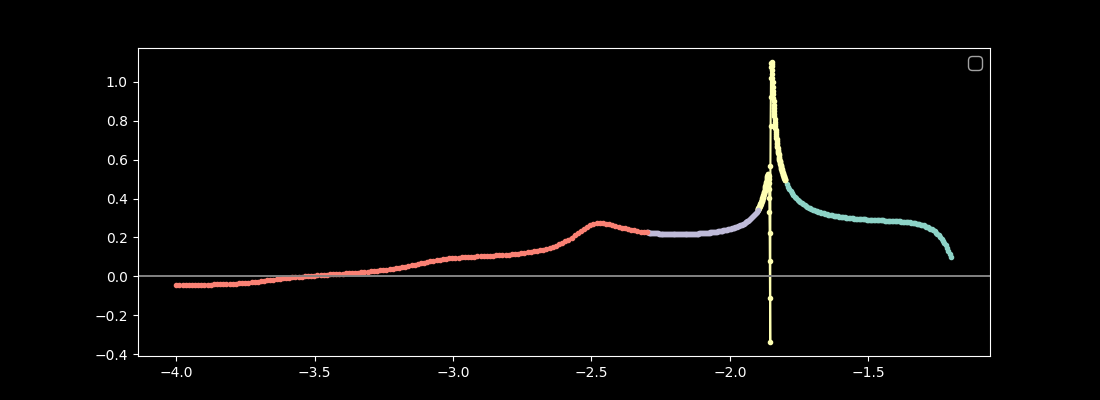

In [127]:
plt.close('all')
_, ax = P_sdp5.plot_transform(xs=P_sdp5.Zs)
P_sdp6.plot_transform(xs=P_sdp6.Zs, ax=ax)
P_sdp7.plot_transform(xs=P_sdp7.Zs, ax=ax)
P_sdp8.plot_transform(xs=P_sdp8.Zs, ax=ax);


In [128]:
# P_sdp9 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=-4, RZ=-10, NZ=100, 
#                      field_type=field_type, paper_method=False, conjugate=False,
#                      sign='+1', sdp_contour=True, sdp_sign=-1)
P_sdp9 = Propagator_Class(A.sdp_contour(-4, -10, 300), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=False,
                     sign='+1')

In [129]:
# P_sdp10 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=-10, RZ=-17, NZ=30, 
#                      field_type=field_type, paper_method=False, conjugate=False,
#                      sign='+1', sdp_contour=True, sdp_sign=-1)
P_sdp10 = Propagator_Class(A.sdp_contour(-10, -17, 500), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=False,
                     sign='+1')

In [130]:
# P_sdp11 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=-17, RZ=-40, NZ=56, 
#                      field_type=field_type, paper_method=False, conjugate=False,
#                      sign='+1', sdp_contour=True, sdp_sign=-1)
P_sdp11 = Propagator_Class(A.sdp_contour(-17, -40, 400), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=False,
                     sign='+1')

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

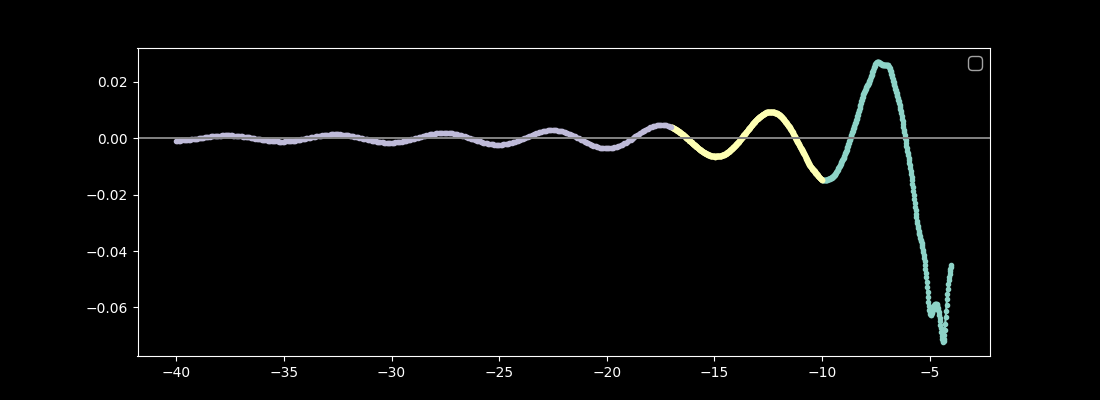

In [131]:
plt.close('all')
_, ax = P_sdp9.plot_transform(xs=P_sdp9.Zs)
P_sdp10.plot_transform(xs=P_sdp10.Zs, ax=ax)
P_sdp11.plot_transform(xs=P_sdp11.Zs, ax=ax)

In [132]:
# P_sdp11 = Propagator_Class(f0=f0, Lx=-b, Rx=b, 
#                      LZ=-17, RZ=-40, NZ=56, 
#                      field_type=field_type, paper_method=False, conjugate=False,
#                      sign='+1', sdp_contour=True, sdp_sign=-1)
P_sdp12 = Propagator_Class(A.sdp_contour(-40, -50, 160), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=False,
                     sign='+1')

In [133]:

P_sdp13 = Propagator_Class(A.sdp_contour(-50, -100, 500), f0=f0, Lx=-b, Rx=b, 
                     field_type=field_type, paper_method=False,
                     sign='+1')

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

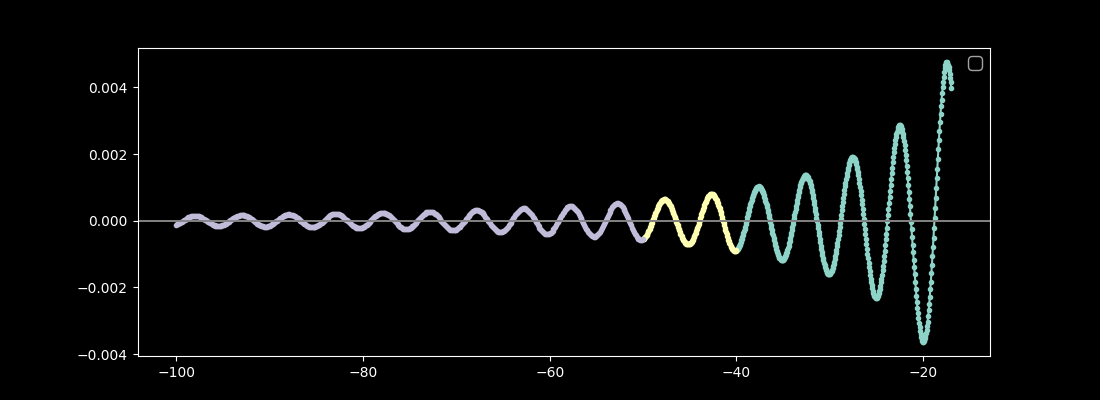

In [134]:
plt.close('all')
_, ax = P_sdp11.plot_transform(xs=P_sdp11.Zs)
P_sdp12.plot_transform(xs=P_sdp12.Zs, ax=ax)
P_sdp13.plot_transform(xs=P_sdp13.Zs, ax=ax)

In [135]:
# F = A.fields_Z(5.3, mode_type='radiation', paper_method=False)
# A.plot_field_1d(F, xs=np.linspace(0,1.2, 4000))

In [136]:
P_sdp = [
    P_sdp1,
    P_sdp2,
    P_sdp3,
    P_sdp4,
    P_sdp5,
    P_sdp6,
    P_sdp7,
    P_sdp8,
    P_sdp9,
    P_sdp10,
    P_sdp11,
    P_sdp12,
    P_sdp13,
]

In [137]:
x0 = 0

sdp = lambda x: sum([P.slice_propagate(x,0) for P in P_sdp])
sdp_z = lambda z, x0=x0: sum([P.slice_propagate(z, x0, 'x') for P in P_sdp])

Sdp = lambda x, z: sum([P.propagate(x, zs=z) for P in P_sdp])

sdp_residual = lambda x: (diff_leaky_w_guided_full(x) - sdp(x))

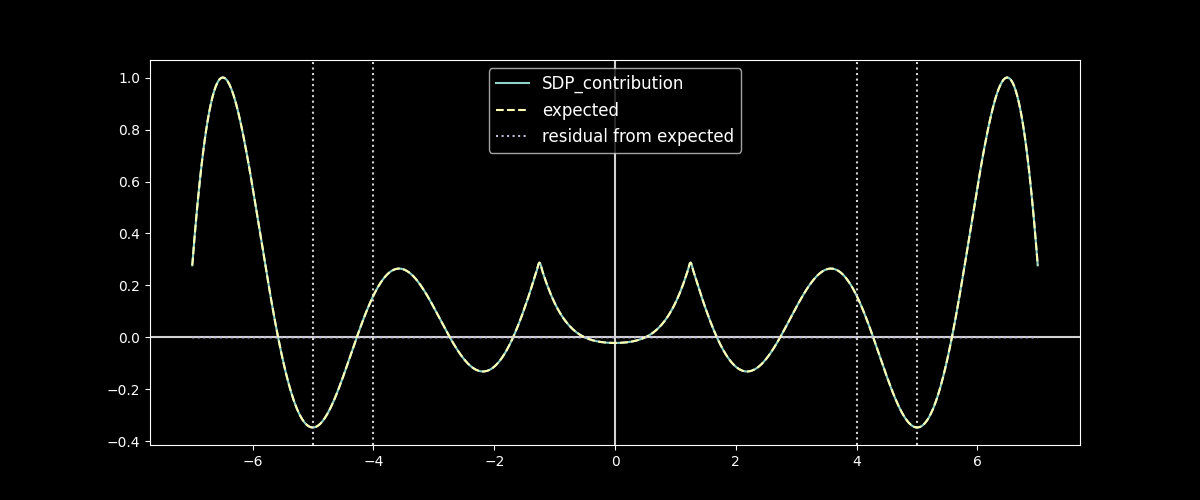

In [138]:
fig, ax = A.plot_field_1d(sdp, xs=np.linspace(-7,7, 1000), part='real', label='SDP_contribution');
A.add_1d_plot(diff_leaky_w_guided_full, xs=np.linspace(-7,7, 1000), part='real', linestyle='--', label='expected')
A.add_1d_plot(sdp_residual, xs=np.linspace(-7,7, 1000), part='real', linestyle=':', label='residual from expected')
# ax.set_ylim(-.33,1)

In [139]:
# A.plot_field_1d(sdp_z, xs=np.linspace(0,20,300), plot_Rhos=False);

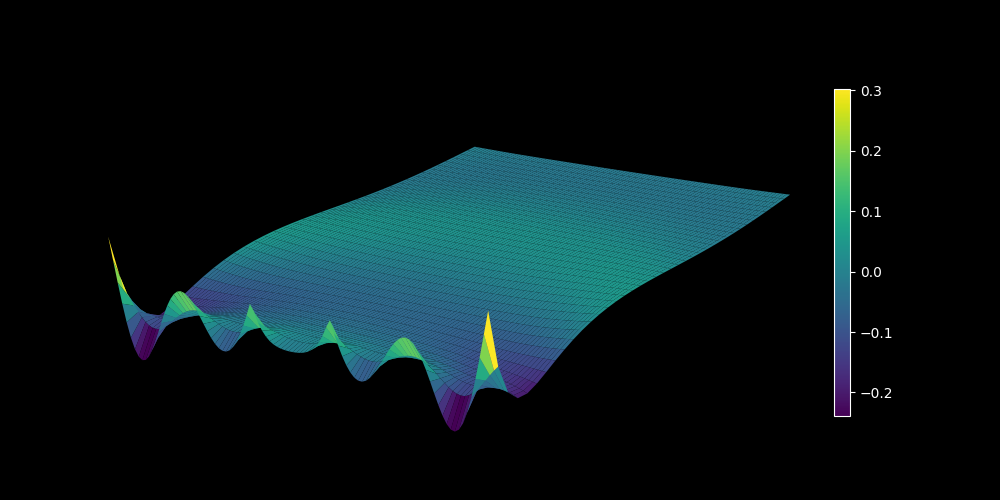

In [140]:
A.plot_field_2d_surface(Sdp, xs=np.linspace(-6, 6, 100), zmax=20, zref=40, cstride=1, rstride=1,
                       colorbar=True, elev=18, azim=-60);

## Leaky field profile at input

In [141]:
leaky_w_sdp = lambda x : leaky(x) - sdp(x)
Leaky_w_sdp = lambda x, z : Leaky(x,z) - Sdp(x,z)

leaky_w_guided_w_sdp = lambda x : leaky_w_guided(x) - sdp(x)
Leaky_w_guided_w_sdp= lambda x, z : Leaky_w_guided(x,z) - Sdp(x,z)

diff_leaky_w_guided_w_sdp_f0 = lambda x: leaky_w_guided_w_sdp(x) - f0(x)
Diff_leaky_w_guided_w_sdp_full = lambda x,z : Leaky_w_guided_w_sdp(x,z) - Full(x,z)

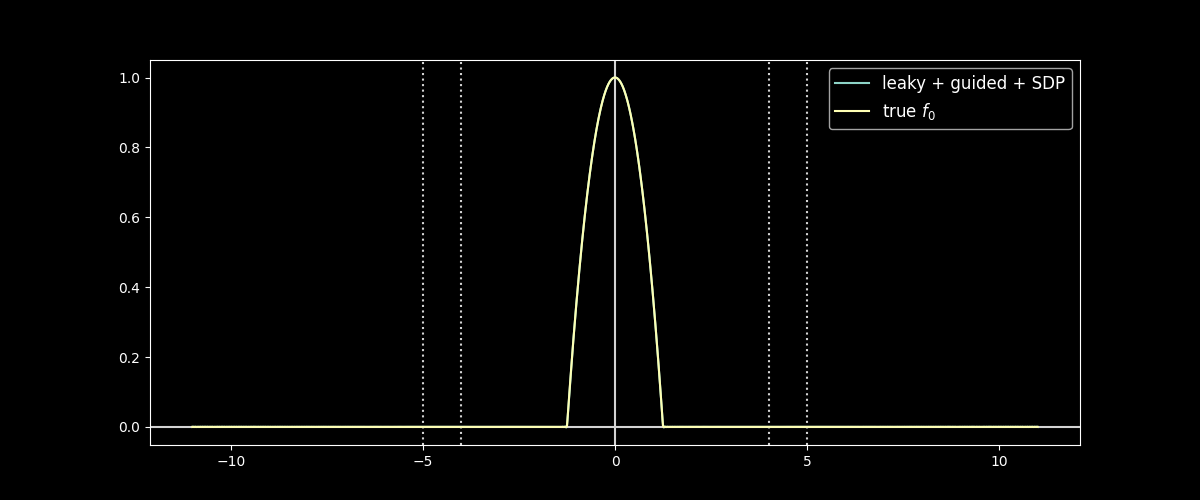

In [144]:
A.plot_field_1d(leaky_w_guided_w_sdp, xs=np.linspace(-11,11, 2000), label='leaky + guided + SDP')
# A.add_1d_plot(full, xs=np.linspace(-11,11, 2000), label='propagated $f_0$')
A.add_1d_plot(f0, xs=np.linspace(-11,11, 2000), linewidth=1.5, label='true $f_0$')
# A.add_1d_plot(diff_w_sdp, xs=np.linspace(-8,8, 2000), linewidth=1.5, label='difference')

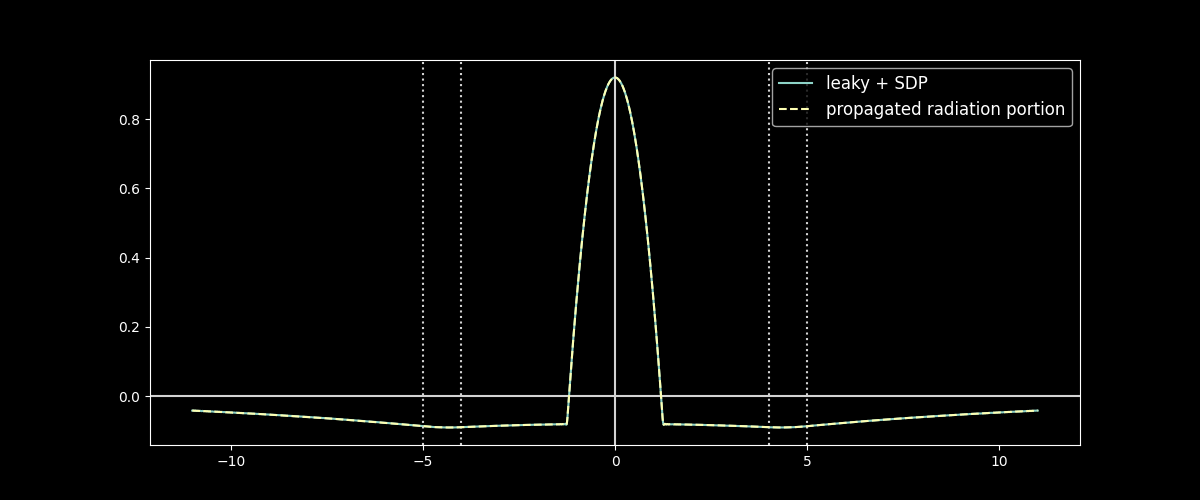

In [143]:
A.plot_field_1d(leaky_w_sdp, xs=np.linspace(-11,11, 2000), label='leaky + SDP')
A.add_1d_plot(rad, xs=np.linspace(-11,11, 2000), linewidth=1.5, linestyle='--', label='propagated radiation portion')


## 2D overhead plot of leaky mode field approximation

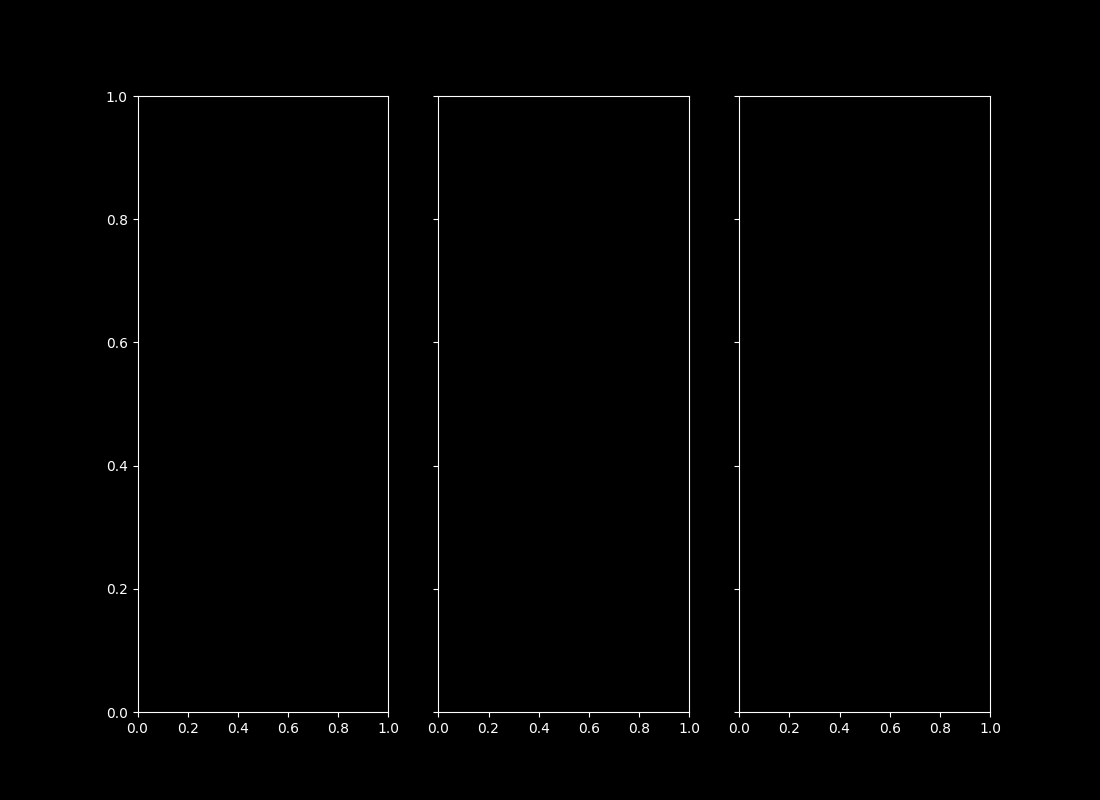

In [146]:
plt.close('all')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(11,8))

zmin = 0
zmax = 60
zref = int((zmax-zmin)*40/2)
zs = np.linspace(zmin, zmax, zref)

In [147]:
A.add_2d_plot(Full, ax=ax1, xs=C.all_Xs, zs=zs, plot_Rhos=True, colorbar=True);
ax1.set_title('True Field')

Text(0.5, 1.0, 'True Field')

In [148]:
A.add_2d_plot(Leaky_w_guided_w_sdp, ax=ax2, xs=C.all_Xs, zs=zs, plot_Rhos=True, colorbar=True);
ax2.set_title('Leaky + Guided + SDP')

Text(0.5, 1.0, 'Leaky + Guided + SDP')

In [149]:
A.add_2d_plot(Diff_leaky_w_guided_w_sdp_full, ax=ax3, xs=C.all_Xs, zs=zs, part='norm', colorbar_format='%.2e', colorbar_nticks=4, plot_Rhos=True, colorbar=True);
ax3.set_title('Norm of Difference')

Text(0.5, 1.0, 'Norm of Difference')

## Asymptotics (slice along z-axis at x=0)

In [150]:
x0 = 0

leaky_w_guided_w_sdp_z = lambda z, x0=x0: leaky_w_guided_z(z, x0=x0) - sdp_z(z, x0=x0)
leaky_w_sdp_z = lambda z, x0=x0: leaky_z(z, x0=x0) - sdp_z(z, x0=x0)

diff_leaky_w_guided_w_sdp_full_z = lambda z, x0=x0: leaky_w_guided_w_sdp_z(z, x0=x0) - full_z(z, x0=x0)

diff_leaky_w_sdp_rad_z= lambda z, x0=x0: leaky_w_sdp_z(z, x0=x0) - rad_z(z, x0=x0)

(-0.15, 0.5)

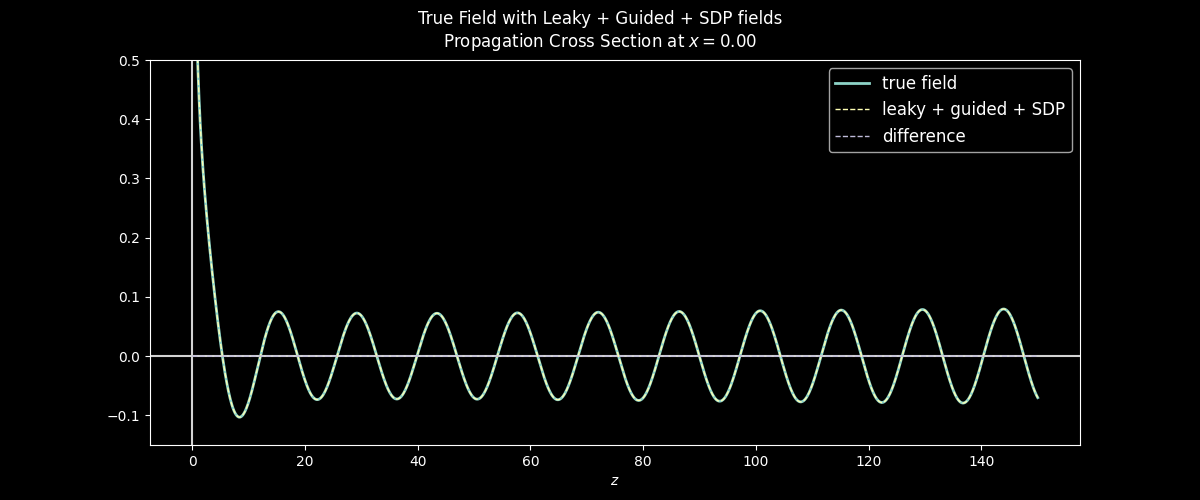

In [151]:
part = 'real'
zmin, zmax = 0,150
zref=int((zmax-zmin)*10)
zs = np.linspace(zmin, zmax, zref)

fig, ax = A.plot_field_1d(full_z, x0, xs=zs, part=part, plot_axis=True, plot_Rhos=False, linewidth=2, label='true field');
A.add_1d_plot(leaky_w_guided_w_sdp_z, x0, xs=zs, part=part, linewidth=1, linestyle='--', label='leaky + guided + SDP');
A.add_1d_plot(diff_leaky_w_guided_w_sdp_full_z, x0, xs=zs, part=part, linewidth=1, linestyle='--', label='difference');
# A.add_1d_plot(ratio_w_sdp, xs=zs, part=part, linewidth=1, linestyle='--', label='ratio');

fig.suptitle('True Field with Leaky + Guided + SDP fields\nPropagation Cross Section at $x=%.2f$'%x0)
ax.set_xlabel('$z$')
ax.set_ylim(-.15,.5)

(-0.07, 0.1)

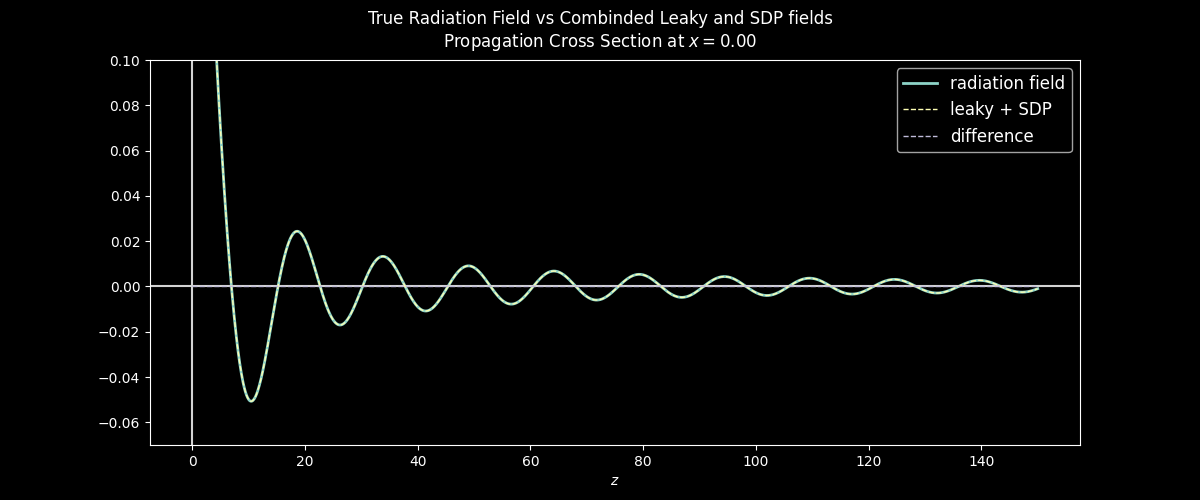

In [152]:
part = 'real'
zmin, zmax = 0,150
zref=int((zmax-zmin)*10)
zs = np.linspace(zmin, zmax, zref)

fig, ax = A.plot_field_1d(rad_z, x0, xs=zs, part=part, plot_axis=True, plot_Rhos=False, linewidth=2, label='radiation field');
A.add_1d_plot(leaky_w_sdp_z, x0, xs=zs, part=part, linewidth=1, linestyle='--', label='leaky + SDP');
A.add_1d_plot(diff_leaky_w_sdp_rad_z, x0, xs=zs, part=part, linewidth=1, linestyle='--', label='difference');
# A.add_1d_plot(ratio_w_sdp, xs=zs, part=part, linewidth=1, linestyle='--', label='ratio');

fig.suptitle('True Radiation Field vs Combinded Leaky and SDP fields\nPropagation Cross Section at $x=%.2f$'%x0)
ax.set_xlabel('$z$')
ax.set_ylim(-.07,.1)

# Connecting Path between SDP and real axis

Does this go to zero as $Z \rightarrow -\infty$?  It is trivial in the direction of propagation as Re(Z) becomes large because it is massively evanescent.  But the profile at the input end does blow up as $x\rightarrow \pm \infty$, though it appears again this blow up becomes slower as Re(Z) becomes large.

In [126]:
x_vert = -100
vertical_contour = A.vertical_contour_sdp(x_vert, 20)

P_vert1 = Propagator_Class(vertical_contour, f0=f0, Lx=-b, Rx=b, paper_method=False)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

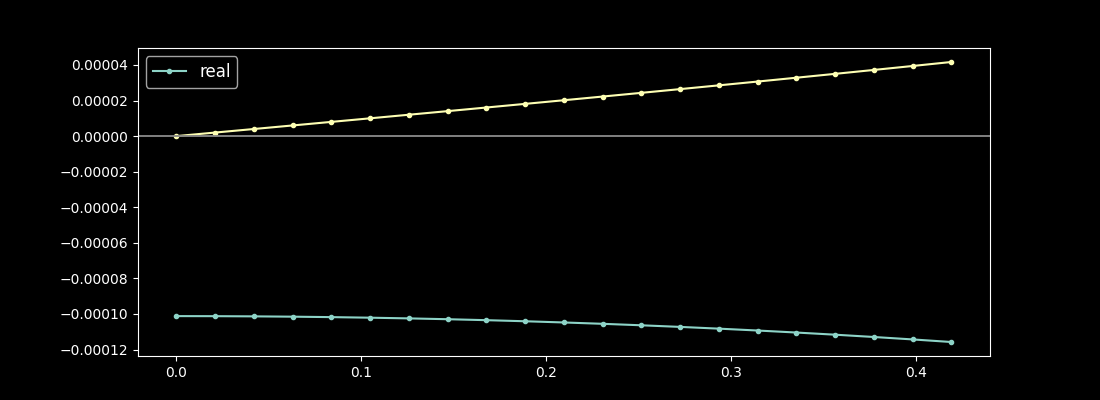

In [127]:
plt.close('all')
_, ax = P_vert1.plot_transform(label='real', xs=P_vert1.Zs.imag)
P_vert1.plot_transform(ax=ax, part='imag', xs=P_vert1.Zs.imag)

In [128]:
vertical = lambda x: P_vert1.slice_propagate(x)
Vertical = lambda x, z: P_vert1.propagate(x,z)
vertical_z = lambda z, x0=x0: P_vert1.slice_propagate(z, x0, 'x')

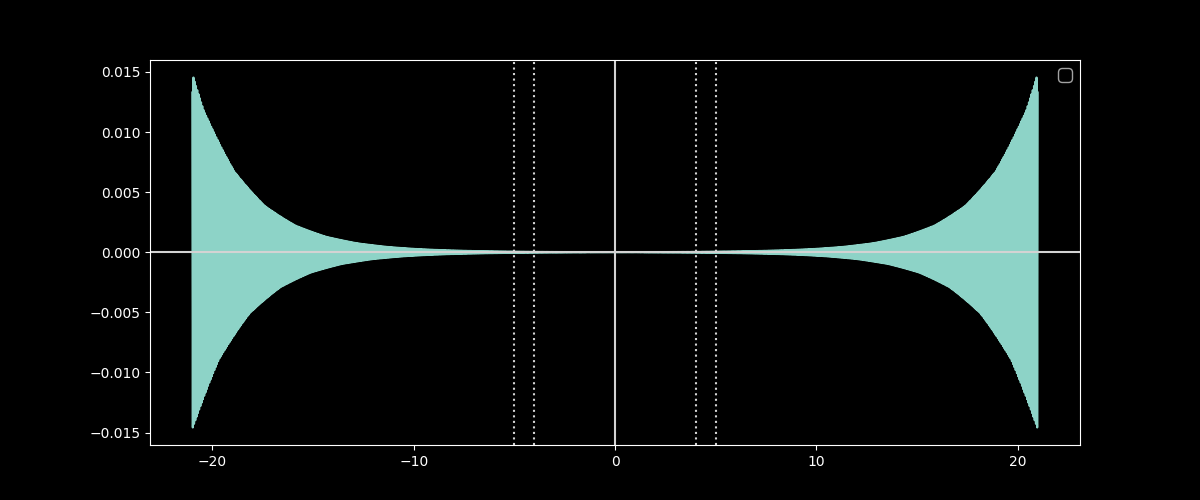

In [129]:
A.plot_field_1d(vertical, xs=np.linspace(-21,21,10000));

Text(0.5, 0, 'z')

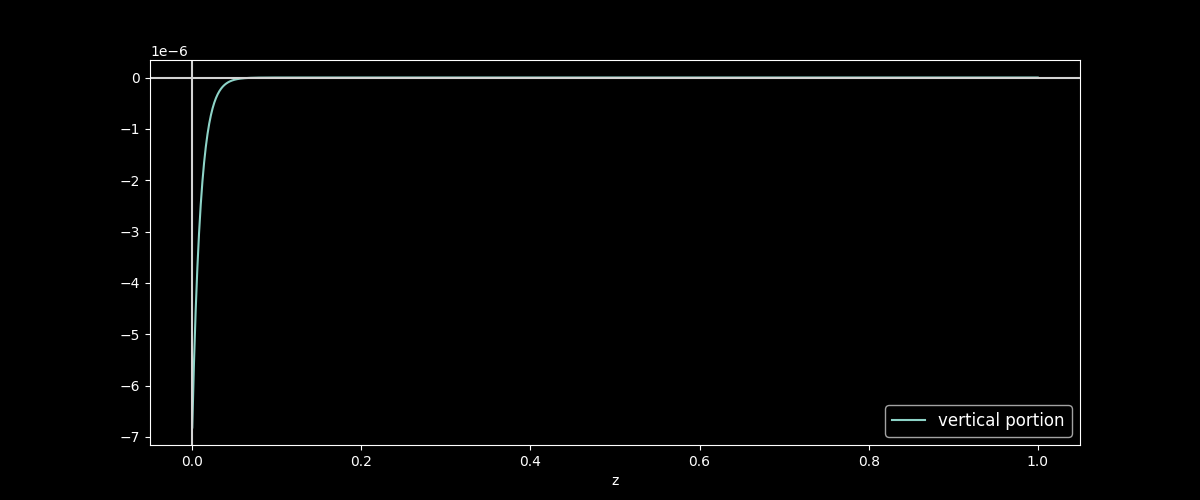

In [130]:
_, ax = A.plot_field_1d(vertical_z, 0, xs=np.linspace(0,1, 1000), plot_Rhos=False, label='vertical portion')
ax.set_xlabel('z')

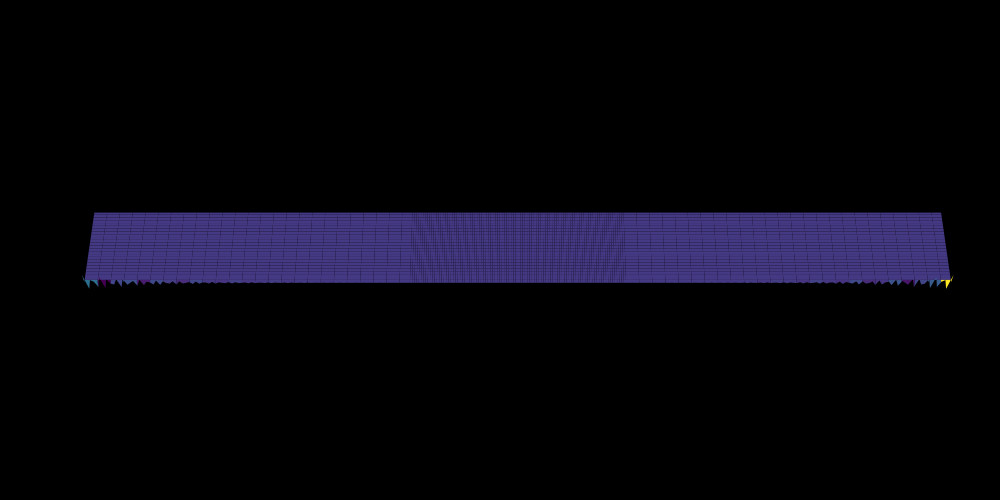

In [191]:
A.plot_field_2d_surface(Vertical);

# Save data for visualization


In [504]:
xs = A.all_Xs
zs = np.linspace(0, 100, int(100*40/2))

In [505]:
f0s = f0(xs)

In [506]:
rad_ys_propagating = Prop(xs, zs)


In [507]:
rad_ys_evanescent = Ev(xs, zs)


In [508]:
# guided_ys = alpha * Fs1(xs, zs=zs)

In [509]:
Xs, Zs = np.meshgrid(xs, zs)

In [510]:
def get_trig_indices(mesh_array):
    '''Get triangle index list for three js mesh formation via indexed buffer geometry.'''
    if len(mesh_array.shape) <= 1:
        raise ValueError('Provide meshgrid array as input.')
    Nz, Nx = mesh_array.shape[0], mesh_array.shape[1]
    l_inds = Nx * Nz
    indices =  np.arange(0, l_inds).reshape((Nx, Nz)).T  # Note transpose
    fbases = indices[:Nz-1, :Nx-1].T.flatten()  # Note transpose and index switch due to transpose
    f1 = np.array([[i, i+Nz, i+1] for i in fbases], dtype=int)
    f2 = np.array([[i+1, i+Nz, i+Nz+1] for i in fbases], dtype=int)
    return np.concatenate((f1, f2))


def get_base_vertices(Xs, Zs):
    '''Get vertices of triangles with zero height (y component in three.js).'''
    if Xs.shape != Zs.shape:
        raise ValueError('Provide meshgrid arrays (ie Xs, Zs = np.meshgrid(xs,zs)) as inputs.')
    Base = np.array([Xs, np.zeros_like(Xs), Zs], dtype=float)
    L = Xs.shape[0] * Xs.shape[1]
    base_vertices = Base.T.reshape((L,3))
    return base_vertices


def create_height_array_from_complex(ys, Xs):
    '''Get data for height from complex ys input (needs to be formatted as list:
        [ys[0].real, ys[0].imag, ys[1].real, ys[1].imag, ... ].'''
    L = Xs.shape[0] * Xs.shape[1]
    Ys = np.array([ys.real, ys.imag], dtype=float)
    heights = Ys.T.reshape((L,2))
    return heights


def save_trig_indices_as_json(filepath, mesh_array):
    indices = get_trig_indices(mesh_array)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(indices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


def save_base_vertices_as_json(filepath, Xs, Zs):
    base_vertices = get_base_vertices(Xs, Zs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(base_vertices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)
        

def save_heights_as_json(filepath, ys, Xs):
    heights= create_height_array_from_complex(ys, Xs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(heights.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)

def save_values_as_json(filepath, f0s):
    with open(filepath + '.json', 'w') as outfile:
        json.dump(f0s.tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


In [511]:
prefix='/home/pv/local/slab/apps/resonant/'

In [512]:
save_trig_indices_as_json(prefix + 'trig_indices_new', Xs)

In [513]:
save_base_vertices_as_json(prefix + 'base_vertices_new', Xs, Zs)

In [514]:
# save_heights_as_json(prefix + 'guided_heights', guided_ys, Xs)

In [515]:
save_heights_as_json(prefix + 'evanescent_heights', rad_ys_evanescent, Xs)

In [516]:
save_heights_as_json(prefix + 'propagating_heights', rad_ys_propagating, Xs)

In [517]:
save_values_as_json(prefix + 'f0s', f0s)

In [518]:
save_values_as_json(prefix + 'x0s', xs)

# Previous leaky mode work

In [18]:
mode_type = 'leaky'
k_low = A.K_low

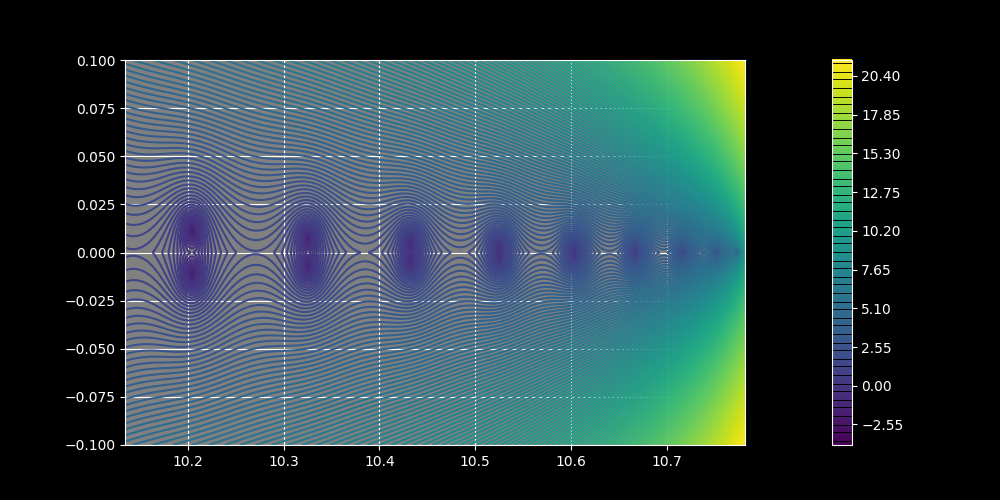

In [19]:
plotlogf(A.determinant, .94*A.K_low, 1.0001*A.K_low, -.1, .1, field_type, mode_type, 
         figsize=(10,5),iref=400, rref=400, levels=200)

### Only even modes necessary

In [20]:
beta1 = newton(A.determinant, 10.775, args=(field_type, mode_type)).conj()
beta2 = newton(A.determinant, 10.715, args=(field_type, mode_type))
beta3 = newton(A.determinant, 10.6, args=(field_type, mode_type))
beta4 = newton(A.determinant, 10.42, args=(field_type, mode_type))
beta5 = newton(A.determinant, 10.2, args=(field_type, mode_type))

betas = [beta1, beta2, beta3, beta4, beta5]
for beta in betas:
    plt.plot(beta.real, beta.imag, marker='o')


In [21]:
Fs1 = A.fields(beta1, field_type=field_type, mode_type=mode_type, c0=-1)
Fs2 = A.fields(beta2, field_type=field_type, mode_type=mode_type, c0=-1)
Fs3 = A.fields(beta3, field_type=field_type, mode_type=mode_type, c0=-1)
Fs4 = A.fields(beta4, field_type=field_type, mode_type=mode_type, c0=-1)
Fs5 = A.fields(beta5, field_type=field_type, mode_type=mode_type, c0=-1)

Fs = [Fs1, Fs2, Fs3, Fs4, Fs5]

leaky
leaky
leaky
leaky
leaky


/home/pv/local/slab/slab.py:535: UserWarning: Provided mode type leaky, but coefficients in outer region do not align with this. User may wish to check supplied propagation constant and/or rounding parameter.
  warn(message='Provided mode type %s, but coefficients in outer \


### Plotting leaky modes

#### 1D plots

/home/pv/local/slab/slab.py:1525: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=legend_fontsize)
/home/pv/local/slab/slab.py:1589: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=legend_fontsize)


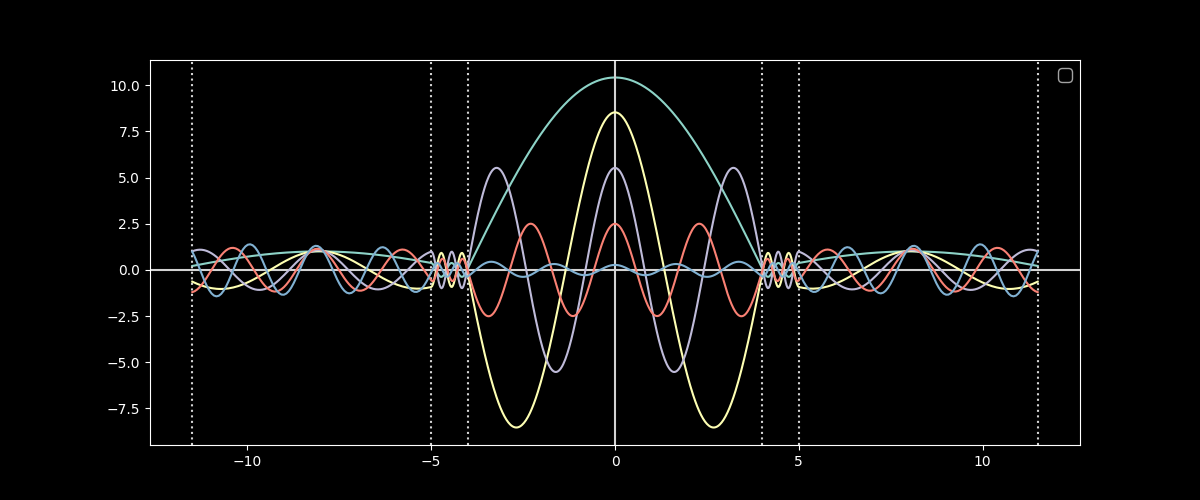

In [22]:
A.plot_field_1d(Fs1)
A.add_1d_plot(Fs2)
A.add_1d_plot(Fs3)
A.add_1d_plot(Fs4)
A.add_1d_plot(Fs5)


### Build "full" leaky field

At this point this is just to get an idea of combining leaky modes.  Scaling should be done via contour integration.

In [23]:
from scipy.integrate import quad
cfs = np.zeros(len(Fs))
alphas = np.zeros(len(Fs))
for i,F in enumerate(Fs):
    integrand = lambda x: F(x) * F(x).conjugate()
    cfs[i] = quad(integrand, A.Rhos[2], A.Rhos[3], complex_func=True)[0].real
    integrand = lambda x: f0(x) * F(x).conjugate()
    alphas[i] = quad(integrand, A.Rhos[2], A.Rhos[3], complex_func=True)[0].real

# Note: Not clear that this is correct process for scaling leaky fields

In [24]:
Full_leaky = lambda x, z: sum([Fs[i](x,z) * alphas[i]/cfs[i] for i in range(len(Fs))])

### 2D plots

In [25]:
xs = np.linspace(-20,20,1000)

(-20.0, 20.0, 0.0, 100.0)

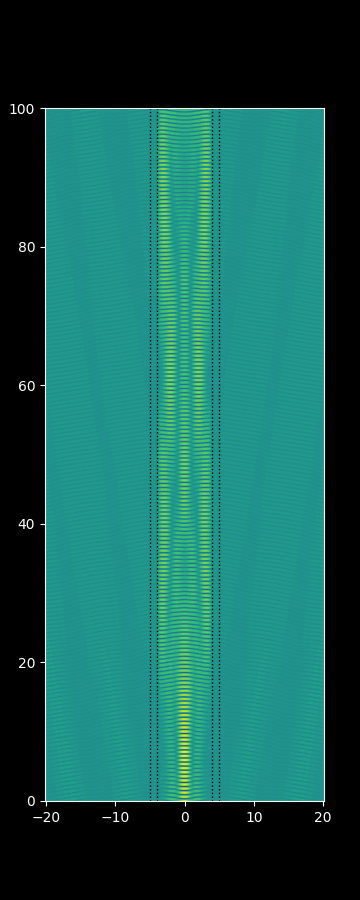

In [26]:
fig, ax = A.plot_field_2d(Full_leaky, xs=xs, zmin=0, zmax=100, zref=2000, colorbar=False)
plt.axis('equal')